# Auswertung 200218_1 0-25000

### imports

In [26]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [27]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
%autoreload

## define master data

In [29]:
measurement_id = "200218_1"
campaign_id    = "01_Messkampagne_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [30]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [31]:
traceName = "Trace"
pulseMin = None
pulseMax = 25000


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

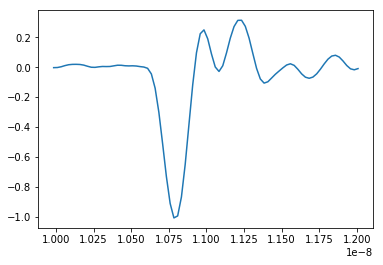

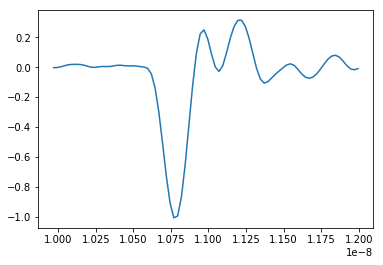

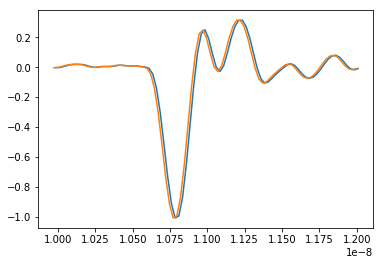

In [33]:
pulsnr = 12345
viewImport(C1, C3, pulsnr)

### define area of interest

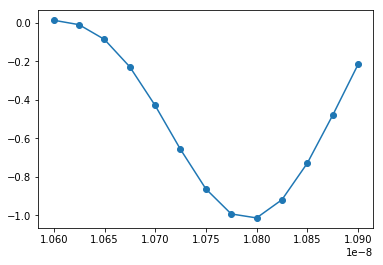

In [51]:
areaMinC1 = 25
areaMaxC1 = 38
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

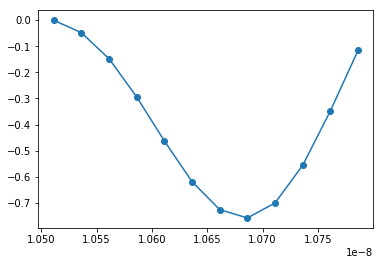

In [52]:
areaMinC3 = 22
areaMaxC3 = 34
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

### fit gaussian function

In [53]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.078e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [54]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [55]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

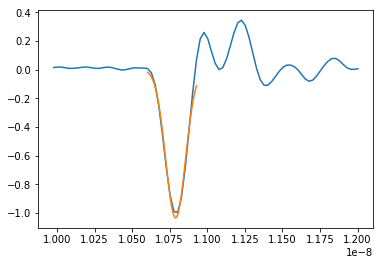

parameter: [-1.70611923e-10  1.07895708e-08  6.58523452e-11] [A, mu, sigma]


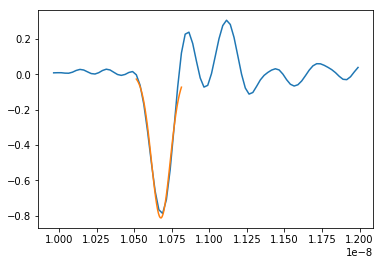

parameter: [-1.26770728e-10  1.06777114e-08  6.22595498e-11] [A, mu, sigma]


In [56]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

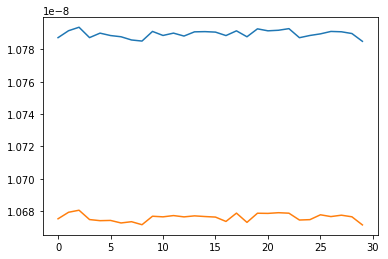

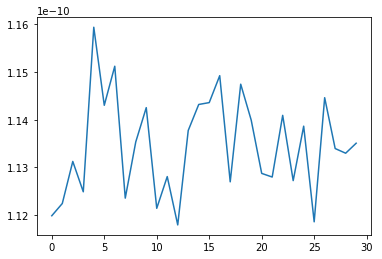

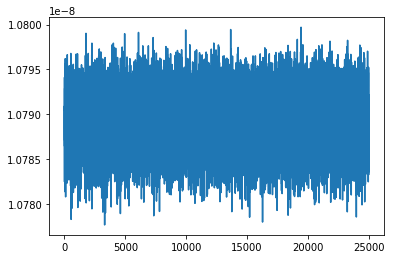

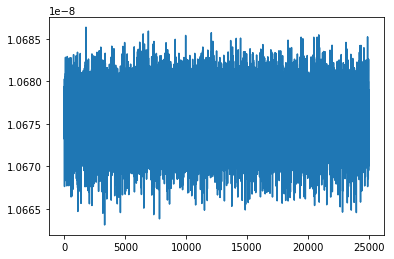

In [57]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

## histogram

In [58]:
JitterGauss = jitter(C1, C3)

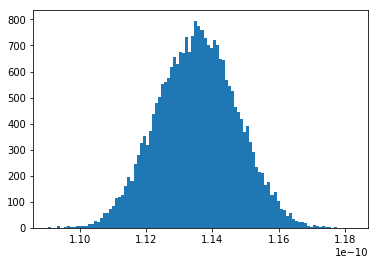

In [59]:
bins = 100

HistY, edges, HistX = histogram(JitterGauss, bins)

## fit gauss to histogram

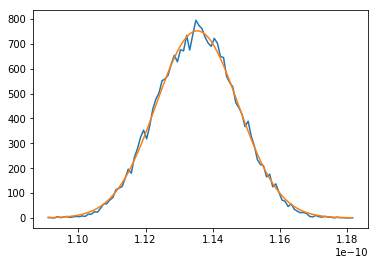

parameter: [2.30872061e-09 1.13541875e-10 1.22387061e-12] [A, mu, sigma]


In [60]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.14e-10, 1e-12]

HistFitParams = fitSingle(np.array([HistX, HistY]), None, None, gaussParamsHist)

### result

In [61]:
DoubleJitter, SingleJitter, Mu = result(HistFitParams)

σ_0: 1.2238706055643118 ps
σ_1: 0.8654072044894111 ps
σ_1 = σ_0 / sqrt(2)

μ: 113.54187530485066 ps

coma separated [σ_0, σ_1, μ]
1.2238706055643118e-12,8.654072044894111e-13,1.1354187530485066e-10

 tab separated [σ_0, σ_1, μ]
1.2238706055643118e-12	8.654072044894111e-13	1.1354187530485066e-10
